In [68]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [69]:
data = pd.read_csv("Automobile_insurance_fraud.csv")

In [70]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [71]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [72]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

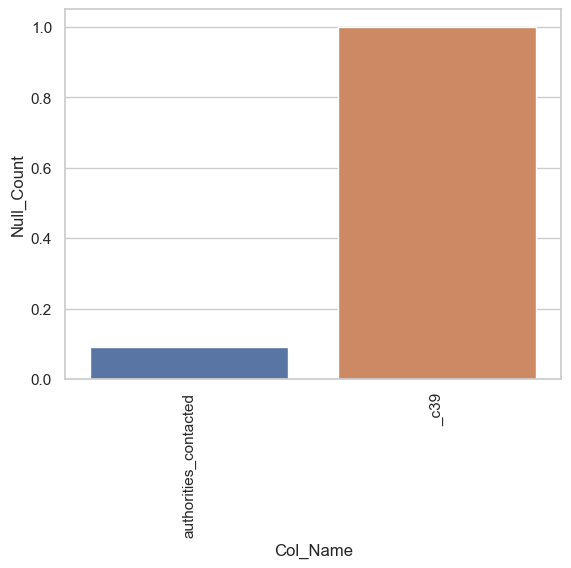

In [74]:
missing = data.isnull().sum()/len(data)
missing = missing[missing>0]
missing.sort_values (inplace=True)
missing = missing.to_frame()
missing.columns=['Null_Count']
missing.index.names=['Col_Name']
missing = missing.reset_index()
sns.set(style='whitegrid', color_codes=True)
sns.barplot(x='Col_Name', y='Null_Count', data=missing)
plt.xticks(rotation=90)
plt.show()

In [75]:
data['collision_type'] = data['collision_type'].fillna(data['collision_type'].mode()[0])
data['property_damage'] = data['property_damage'].fillna(data['property_damage'].mode()[0])
data['police_report_available'] = data['police_report_available'].fillna(data['police_report_available'].mode()[0])

In [76]:
plt.figure(figsize = (18, 15))

corr = data.corr()

sns.heatmap(data = corr, annot = True, fmt = '.1g', linewidth = 2)
plt.show()

ValueError: could not convert string to float: '17-10-2014'

<Figure size 1800x1500 with 0 Axes>

In [77]:
unique = data.nunique().to_frame()
unique.columns = ['Count']
unique.index.names = ['ColName']
unique = unique.reset_index()
sns.set(style='whitegrid', color_codes=True)
sns.batplot(x='ColName', y='Count', data=unique)
plt.xticks(rotation=90)
plt.show()

AttributeError: module 'seaborn' has no attribute 'batplot'

In [78]:
unique.sort_values(by='Count', ascending=False)

,ColName,Count
2,policy_number,1000
24,incident_location,1000
9,insured_zip,995
7,policy_annual_premium,991
3,policy_bind_date,951
31,total_claim_amount,763
34,vehicle_claim,726
32,injury_claim,638
33,property_claim,626
0,months_as_customer,391


In [79]:
# drop columns which not use
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year','_c39']
data.drop(to_drop, inplace = True, axis = 1)

In [80]:
plt.figure(figsize = 18,15)

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

SyntaxError: positional argument follows keyword argument (2637635763.py, line 1)

In [81]:
data.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [82]:
data.head()

ColName,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,?,0,0,?,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,?,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [83]:
X = data.drop('fraud_reported', axis = 1)
y = data['fraud_reported']

In [84]:
categorical_cols = X.select_dtypes(include = ['object'])
categorical_cols = pd.get_dummies(categorical_cols, drop_first = True)
categorical_cols.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,True,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True
1,True,False,True,False,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,True,True,False,True,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,True,False,False,True,False
4,False,True,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False


In [85]:
numerical_col = X.select_dtypes(include = ['int64'])
X = pd.concat([numerical_col, categorical_cols], axis = 1)

In [86]:
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,False,False,False,False,False,True,False,True,False,True
1,228,2000,5000000,0,0,8,1,0,0,780,...,True,False,False,False,False,True,False,False,False,False
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,True,False,False,False,False,True,True,False,True,False
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,False,False,False,False,False,True,False,False,True,False
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,True,False,False,False,False,False,True,False,True,False


In [87]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for col in x.columns:
    if plotnumber <= 24:
        ax = plt.subplots(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    plotnumber += 1
ple.tight_layout()
plt.show()

NameError: name 'x' is not defined

<Figure size 2000x1500 with 0 Axes>

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [89]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
108,298,2000,0,28800,0,1,1,0,0,10860,...,False,False,False,True,False,False,False,False,False,False
91,61,2000,4000000,0,-62400,14,1,0,3,8940,...,False,False,False,False,False,True,True,False,False,False
229,154,1000,0,0,-67800,2,1,0,3,14460,...,True,False,False,False,True,False,False,False,True,False
964,163,1000,4000000,0,-36400,7,1,2,1,390,...,True,False,False,False,False,True,False,False,False,True
781,70,1000,0,62400,-52300,12,1,0,3,11560,...,True,False,False,False,False,False,True,False,False,False


In [90]:
numerical_data = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim', 'vehicle_claim']]

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [92]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = numerical_data.columns, index = X_train.index)
scaled_data = scaler.fit_transform(numerical_data)

In [93]:
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
108,0.827027,1.430564,-0.496582,0.152873,0.966884,-1.511865,-0.806379,-1.194581,-1.342883,0.730029,0.754534,0.617241
91,-1.251209,1.430564,1.209886,-0.878889,-1.263332,0.357594,-0.806379,-1.194581,1.354873,0.341576,2.200469,1.793428
229,-0.435699,-0.208738,-0.496582,-0.878889,-1.456331,-1.368061,-0.806379,-1.194581,1.354873,1.458377,0.006849,1.083043
964,-0.356778,-0.208738,1.209886,-0.878889,-0.334075,-0.649038,-0.806379,1.207391,-0.443631,-1.388251,-1.321681,-1.778753
781,-1.172289,-0.208738,-0.496582,1.356595,-0.902351,0.069985,-0.806379,-1.194581,1.354873,0.871652,0.898716,0.480669


In [94]:
X_train.drop(columns = scaled_num_df.columns, inplace=True)

In [95]:
X_train = pd.concat([scaled_num_df, X_train, axis = 1])

SyntaxError: invalid syntax (2210169092.py, line 1)

In [96]:
X_train.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
108,False,True,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
91,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
229,True,False,False,False,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
964,False,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
781,False,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,True,False,False,False


In [98]:
from sklearn.svm import svc

svc_model = svc()
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

ImportError: cannot import name 'svc' from 'sklearn.svm' (C:\Users\gdmis\anaconda3\lib\site-packages\sklearn\svm\__init__.py)

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_model_train_acc = accuracy_score(y_train, svc_model.predict(X_train))
print("Training Accurecy: ",svc_model_train_acc)
print("Testing Accuracy: ", svc_model_test_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'svc_model' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 30)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_model_train_acc = accuracy_score(y_train, knn_model.predict(X_train))

print("Training Accurecy:", knn_model_train_acc)
print("Testing Accurecy:", knn_model_test_acc)
print(confusion_matrix(y_test, t_pred))
print(classification_report(y_test, y_pred))

In [ ]:
plt.bar(models['Model'],models['Score'], width=0.4, color='maroon')
plt.xlabel("Models")
plt.xticks(rotation=90)
plt.ylabel("Score")
plt.title("Model for Insurance Fraude Detection")